In [ ]:
import pandas as pd
data = pd.read_csv('train.csv')
data

In [9]:
df = data
df

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,Kamar tidak bersih,0
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,31ca5a04ccc0dae4eaafc91c9822bede,Wifinya sangat kurang memadai..,0


In [ ]:
#tokenize
#hapussimbol (koma dll)
#stemming
#remove stopword
#cek kbbi

In [1]:
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [3]:
from kbbi import KBBI

# lowering

In [10]:
df['review_text'] = [data.lower() for data in df['review_text'] if data.isalpha]
df

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"wc jorok.. kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,kamar tidak bersih,0
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,31ca5a04ccc0dae4eaafc91c9822bede,wifinya sangat kurang memadai..,0


In [6]:
df['review_text'] = [ " ".join(data) for data in df['review_text']]
df['review_text']

NameError: name 'df' is not defined

In [131]:
df['review_text'] = [ tokenize(data) for data in df['review_text'] ]
df['review_text']

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"[p, e, n, g, i, n, a, p, a, n, n, y, a, r, a, ...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"[w, i, f, i, t, i, d, a, k, s, a, m, p, a, i, ...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"[l, a, n, t, a, i, k, a, m, a, r, m, a, n, d, ...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"[w, c, j, o, r, o, k, k, a, s, u, r, t, i, d, ...",0
4,e2afef18bd695fae43d4d53b8c547bd4,"[b, o, c, o, r, l, a, g, i]",0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,"[k, o, t, o, r, d, a, n, t, i, d, a, k, a, d, ...",0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,"[k, a, m, a, r, t, i, d, a, k, b, e, r, s, i, h]",0
14853,5217f5f284066f232d7b3c3bbd3cccd2,"[k, a, m, a, r, n, y, a, t, e, r, l, a, l, u, ...",0
14854,31ca5a04ccc0dae4eaafc91c9822bede,"[w, i, f, i, n, y, a, s, a, n, g, a, t, k, u, ...",0


In [130]:
review['review_text'] = [hapusSimbol(data) for data in review['review_text']]
review['review_text']

0        [p, e, n, g, i, n, a, p, a, n, n, y, a, r, a, ...
1        [w, i, f, i, t, i, d, a, k, s, a, m, p, a, i, ...
2        [l, a, n, t, a, i, k, a, m, a, r, m, a, n, d, ...
3        [w, c, j, o, r, o, k, k, a, s, u, r, t, i, d, ...
4                              [b, o, c, o, r, l, a, g, i]
                               ...                        
14851    [k, o, t, o, r, d, a, n, t, i, d, a, k, a, d, ...
14852     [k, a, m, a, r, t, i, d, a, k, b, e, r, s, i, h]
14853    [k, a, m, a, r, n, y, a, t, e, r, l, a, l, u, ...
14854    [w, i, f, i, n, y, a, s, a, n, g, a, t, k, u, ...
14855    [p, e, l, a, y, a, n, s, a, n, g, a, t, s, a, ...
Name: review_text, Length: 14856, dtype: object

In [117]:
review['review_text'] = [tokenize(data) for data in review['review_text']]
review

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"[penginapannya, rapi, ,, bersih, ,, suasana, t...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"[wifi, tidak, sampai, kamar, ,, tidak, tersedi...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"[lantai, kamar, mandi, kotor, ,, bau, ,, dan, ...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"[wc, jorok, .., kasur, tidak, dibersihkan, ,, ...",0
4,e2afef18bd695fae43d4d53b8c547bd4,"[bocor, lagi]",0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,"[kotor, dan, tidak, ada, wifi]",0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,"[kamar, tidak, bersih]",0
14853,5217f5f284066f232d7b3c3bbd3cccd2,"[kamarnya, terlalu, kecil, beberapa, cm, antar...",0
14854,31ca5a04ccc0dae4eaafc91c9822bede,"[wifinya, sangat, kurang, memadai, ..]",0


In [17]:
eng = stopwords.words('english')
ind = stopwords.words('indonesian')

In [33]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer_obj = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [68]:
lemmatizer_obj.lemmatize('minimizing',pos='n')

'minimizing'

In [40]:
stemmer.stem('dibersihkan')

'bersih'

In [18]:
def hurufkecil(text):
    return text.lower()

def tokenize(text):
    text = word_tokenize(text)
    return(text)

def hapusSimbol(sentence): #tokenize first
    words = []
    for word in sentence:
        if word.isalpha():
            words.append(word)
    return words

def hapusSimbolLine(text):
    text = text.replace('\n','')
    text = text.replace('\t','')
    return text

def hapusSingkatan(text):
    text = text.replace('sdh','sudah')
    text = text.replace('jdi','jadi')
    text = text.replace('lgi','lagi')
    text = text.replace('lg','lagi')
    text = text.replace('tpi','tapi')
    text = text.replace('tp','tapi')
    text = text.replace('lbh','lebih')
    text = text.replace('jg','juga')
    return text

def stemming(words): #tokenize first
    return stemmer.stem(words)

def removeStopWords(text):
    words = []
    for word in text:
        if word not in ind:
            words.append(word)
    return words

def removeStopWordsEng(text):
    words = []
    for word in text:
        if word not in eng:
            words.append(word)
    return words

def stemm(data):
    words = []
    for word in data:
        stm = stemmer.stem(word)
        words.append(stm)
    return words

In [24]:
dftry

,review_id,review_text,category,stemmed
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"[penginapannya, rapi, bersih, suasana, tenang,...",1,"[inap, rapi, bersih, suasana, tenang, layan, r..."
1,7d8cb2e465c5602e51c1ba8710e8ff16,"[wifi, kamar, tersedia, heater, dispenser, ter...",0,"[wifi, kamar, sedia, heater, dispenser, sedia,..."
2,1f4447c73e5e1aac462d05b0ecbd5a55,"[lantai, kamar, mandi, kotor, bau, sdh, jdi, s...",0,"[lantai, kamar, mandi, kotor, bau, sdh, jdi, s..."
3,b9aefbfb0debbfff43f8b268c82b43c0,"[wc, jorok, kasur, dibersihkan, handuk, diganti]",0,"[wc, jorok, kasur, bersih, handuk, ganti]"
4,e2afef18bd695fae43d4d53b8c547bd4,[bocor],0,[bocor]
...,...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,"[kotor, wifi]",0,"[kotor, wifi]"
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,"[kamar, bersih]",0,"[kamar, bersih]"
14853,5217f5f284066f232d7b3c3bbd3cccd2,"[kamarnya, cm, kasur, dinding]",0,"[kamar, cm, kasur, dinding]"
14854,31ca5a04ccc0dae4eaafc91c9822bede,"[wifinya, memadai]",0,"[wifinya, pada]"


<h1> satu kotak dibawah ini runningnya hampir sejam </h1>

In [23]:
dftry['stemmed'] = dftry['review_text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [75]:
dftry['stemmed1'] = dftry['stemmed'].apply(lambda x: [lemmatizer_obj.lemmatize(y,pos='v') for y in x])

In [353]:
data5 = [ hapusSingkatan(data) for data in data5 ]
data5

['wifi kamar sedia heater dispenser sedia kursi kamar rokok duduk lantai',
 'lantai kamar mandi kotor bau sudah jadi sarang nyamuk kamar mandi pesan superior double yg kasih twin murah maklumin tapi depan mohon jadi baik lebih lagi',
 'wc jorok kasur bersih handuk ganti',
 'bocor',
 'bersih layan kerapihan']

In [5]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7E36-D361

 Directory of C:\Users\User\Documents

26/01/2021  23:28    <DIR>          .
26/01/2021  23:28    <DIR>          ..
26/01/2021  11:57    <DIR>          .ipynb_checkpoints
18/05/2020  22:08           188.402 76.ipynb
10/01/2021  23:10            49.773 buy.simp
10/01/2021  23:10               337 buy.simp.user
04/12/2020  13:07           476.039 data manipulation pandas 2.ipynb
26/01/2021  23:28         1.145.070 Datavidia.ipynb
26/01/2021  11:49         1.060.395 data_rapi.csv
25/01/2021  15:00         1.668.439 data_review.csv
26/01/2021  11:44    <DIR>          ds
25/01/2021  14:56    <DIR>          GitHub
26/01/2021  21:50         3.493.960 IndStemmed.csv
21/01/2021  19:32           609.226 Machine Learning beginner.ipynb
02/01/2021  17:01            36.610 PBO.simp
02/01/2021  17:01               165 PBO.simp.user
05/12/2020  21:58            15.138 pboUAS.simp
05/12/2020  21:58               165 pboUAS.simp.user
16/

In [27]:
dftry.to_csv('IndStemmed.csv', index=False)

ALGORITMA

cek kbbi:

    string semua

    set(string)
   
    cek kbbi()

    append to string kosong

In [ ]:
def cekKBBI(text):
    kata = []
    for word in text:
        try:
            KBBI(word)
            kata.append(word)
        except:
            print('tidak ada', word)
    return kata
dftry['stemmed1'] = [cekKBBI(sentence) for sentence in dftry['stemmed1']]
dftry['stemmed1']

tidak ada wifi
tidak ada heater
tidak ada sdh
tidak ada jdi
tidak ada double
tidak ada twin
tidak ada maklumin
tidak ada tpi
tidak ada jdi
tidak ada baik
tidak ada lbh
tidak ada lg
tidak ada wc
tidak ada jorok
tidak ada kasur
tidak ada bersih
tidak ada handuk
tidak ada ganti
tidak ada bocor
tidak ada bersih
tidak ada layan
tidak ada kerapihan
tidak ada tidur
tidak ada krn
tidak ada bantal
tidak ada bau
tidak ada apek
tidak ada layan
tidak ada kmr
tidak ada bersih
tidak ada menu
tidak ada makan
tidak ada enak
tidak ada sayang
tidak ada wifinya
tidak ada kutang
tidak ada bagus
tidak ada kamar
tidak ada kecoa
tidak ada tlg
tidak ada perhati
tidak ada bersih
tidak ada kamar
tidak ada mandi
tidak ada banjir
tidak ada jaga
tidak ada bersih
tidak ada tidur
tidak ada nyaman
tidak ada tamu
tidak ada betiga
tidak ada anak
tidak ada tilam
tidak ada hibak
tidak ada pempijit
tidak ada sarang
tidak ada pempijit
tidak ada kepala
tidak ada ranjang
tidak ada untung
tidak ada pindah
tidak ada kamar
tida

tidak ada laundry
tidak ada handuk
tidak ada kotor
tidak ada selimut
tidak ada tipis
tidak ada nyamuk
tidak ada musim
tidak ada hujan
tidak ada samping
tidak ada rawa
tidak ada layan
tidak ada fasilitas
tidak ada sedia
tidak ada harga
tidak ada murah
tidak ada air
tidak ada panas
tidak ada snack
tidak ada bersih
tidak ada tingkat
tidak ada ga
tidak ada dapet
tidak ada snacknya
tidak ada aduuuh
tidak ada deh
tidak ada nginap
tidak ada air
tidak ada panas
tidak ada ga
tidak ada sempit
tidak ada lampu
tidak ada mati
tidak ada breakfast
tidak ada ga
tidak ada overall
tidak ada puas
tidak ada kesan
tidak ada inap
tidak ada foto
tidak ada kunci
tidak ada kamar
tidak ada mandi
tidak ada fungsi
tidak ada mesti
tidak ada sengaja
tidak ada kamar
tidak ada mandi
tidak ada tutup
tidak ada kunci
tidak ada bagus
tidak ada wifi
tidak ada lancar
tidak ada banget
tidak ada kutu
tidak ada acnya
tidak ada mati
tidak ada aernya
tidak ada jelek
tidak ada wcnya
tidak ada bau
tidak ada kamar
tidak ada kedap


In [12]:
df['review_text'] = [ tokenize(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, rapi, ,, bersih, ,, suasana, t...
1        [wifi, tidak, sampai, kamar, ,, tidak, tersedi...
2        [lantai, kamar, mandi, kotor, ,, bau, ,, dan, ...
3        [wc, jorok, .., kasur, tidak, dibersihkan, ,, ...
4                                            [bocor, lagi]
                               ...                        
14851                       [kotor, dan, tidak, ada, wifi]
14852                               [kamar, tidak, bersih]
14853    [kamarnya, terlalu, kecil, beberapa, cm, antar...
14854               [wifinya, sangat, kurang, memadai, ..]
14855    [pelayan, sangat, sangat, buruk, ., dulu, pela...
Name: review_text, Length: 14856, dtype: object

In [14]:
df['review_text'] = [ hapusSimbol(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, rapi, bersih, suasana, tenang,...
1        [wifi, tidak, sampai, kamar, tidak, tersedia, ...
2        [lantai, kamar, mandi, kotor, bau, dan, sepert...
3        [wc, jorok, kasur, tidak, dibersihkan, handuk,...
4                                            [bocor, lagi]
                               ...                        
14851                       [kotor, dan, tidak, ada, wifi]
14852                               [kamar, tidak, bersih]
14853    [kamarnya, terlalu, kecil, beberapa, cm, antar...
14854                   [wifinya, sangat, kurang, memadai]
14855    [pelayan, sangat, sangat, buruk, dulu, pelayan...
Name: review_text, Length: 14856, dtype: object

In [19]:
df['review_text'] = [ removeStopWords(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, rapi, bersih, suasana, tenang,...
1        [wifi, kamar, tersedia, heater, dispenser, ter...
2        [lantai, kamar, mandi, kotor, bau, sdh, jdi, s...
3         [wc, jorok, kasur, dibersihkan, handuk, diganti]
4                                                  [bocor]
                               ...                        
14851                                        [kotor, wifi]
14852                                      [kamar, bersih]
14853                       [kamarnya, cm, kasur, dinding]
14854                                   [wifinya, memadai]
14855    [pelayan, buruk, pelayan, nya, ramah, skrg, ga...
Name: review_text, Length: 14856, dtype: object

In [20]:
df['review_text'] = [ removeStopWordsEng(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, rapi, bersih, suasana, tenang,...
1        [wifi, kamar, tersedia, heater, dispenser, ter...
2        [lantai, kamar, mandi, kotor, bau, sdh, jdi, s...
3         [wc, jorok, kasur, dibersihkan, handuk, diganti]
4                                                  [bocor]
                               ...                        
14851                                        [kotor, wifi]
14852                                      [kamar, bersih]
14853                       [kamarnya, cm, kasur, dinding]
14854                                   [wifinya, memadai]
14855    [pelayan, buruk, pelayan, nya, ramah, skrg, ga...
Name: review_text, Length: 14856, dtype: object

In [44]:
df['review_text'] = [ stemm(data) for data in df['review_text'] ]
df['review_text']

0        [inap, rapi, bersih, suasana, tenang, layan, r...
1        [wifi, kamar, sedia, heater, dispenser, sedia,...
2        [lantai, kamar, mandi, kotor, bau, sdh, jdi, s...
3                [wc, jorok, kasur, bersih, handuk, ganti]
4                                                  [bocor]
                               ...                        
14851                                        [kotor, wifi]
14852                                      [kamar, bersih]
14853                          [kamar, cm, kasur, dinding]
14854                                      [wifinya, pada]
14855    [layan, buruk, layan, nya, ramah, skrg, ganti,...
Name: review_text, Length: 14856, dtype: object

In [162]:
#list to text
df['review_text'] = [ " ".join(data) for data in df['review_text']]
df['review_text']

0        inap rapi bersih suasana tenang layan ramah ba...
1        wifi kamar sedia heater dispenser sedia kursi ...
2        lantai kamar mandi kotor bau sdh jdi sarang ny...
3                       wc jorok kasur bersih handuk ganti
4                                                    bocor
                               ...                        
14851                                           kotor wifi
14852                                         kamar bersih
14853                               kamar cm kasur dinding
14854                                         wifinya pada
14855    layan buruk layan nya ramah skrg ganti layan b...
Name: review_text, Length: 14856, dtype: object

In [379]:
# cleanData = df
cleanData

,review_text,category
0,"[n, p, , r, p, , b, e, r, h, , u, n, , e, ...",1
1,"[w, f, , k, r, , e, , h, e, e, r, , p, e, ...",0
2,"[l, n, , k, r, , n, , k, r, , b, u, , h, ...",0
3,"[w, c, , j, r, k, , k, u, r, , b, e, r, h, ...",0
4,"[b, c, r]",0
...,...,...
14851,"[k, r, , w, f]",0
14852,"[k, r, , b, e, r, h]",0
14853,"[k, r, , c, , k, u, r, , n, n, g]",0
14854,"[w, f, n, , p]",0


<h1> preparing model & prediction </h1>

In [287]:
feature = df['review_text'].values.tolist()

In [167]:
label = df['category'].values
label

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [289]:
vectorizer = TfidfVectorizer(max_features=4569).fit(feature)
data_vector = vectorizer.transform(feature)

In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_vector, label, test_size=0.3, random_state=123)

In [187]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [185]:
#model SVM
model = SVC()
model = model.fit(X_train,y_train)

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#model naive bayes
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [292]:
model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

<h1>HASIL PREDIKSI</h1>

In [293]:
pred_nb = model_nb.predict(X_test)
print(accuracy_score(pred_nb,y_test))

0.8990352254879964


In [294]:
print(classification_report(pred_nb,y_test))
print(confusion_matrix(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4243
           1       0.31      0.89      0.46       214

    accuracy                           0.90      4457
   macro avg       0.65      0.90      0.70      4457
weighted avg       0.96      0.90      0.92      4457

[[3816   23]
 [ 427  191]]


In [186]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4095
           1       0.52      0.88      0.65       362

    accuracy                           0.92      4457
   macro avg       0.75      0.91      0.81      4457
weighted avg       0.95      0.92      0.93      4457



In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_svm, y_test)

0.9237155037020417

In [189]:
print(confusion_matrix(y_test,pred_svm))

[[3797   42]
 [ 298  320]]


In [192]:
data_test = pd.read_csv('test.csv')
data_test

,review_id,review_text
0,7302180ac7160f04a405d8aa7bd6beb8,"Kasur rusak, punggung saya sakit, kasurnya ga ..."
1,3184c670e170f565c7522eb76a320ba1,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,"tempat ridur atas bawah.. ac nya pararel, tdk ..."
3,061d388950340070a6ac03fabc9027b0,"ac kurang dingin, tidak ada snack sperti di foto"
4,e62d87c348674b6c06856964f3ab16b8,Lumayan untuk guest house dengan standart harg...
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,Tolong kamar 214 kulkasnya dibagusin..!!!
3710,4fabd4722dd4074841f9656f75105f09,"buruk sekali, sangat mengecewakan.\n"
3711,44ff89997547d54cccb2a33776181240,Lampu redup. Bau pengap. Dalam kamar mandi ga ...
3712,c46cf84e3665a10199a539fee919edd6,"Kamar mawar tidak bisa dikunci dari luar, suas..."


<h1>PREPARING DATA TEST</h1>

In [300]:
data_test

,review_id,review_text
0,7302180ac7160f04a405d8aa7bd6beb8,kasur rusak punggung sakit kasur ga padat leng...
1,3184c670e170f565c7522eb76a320ba1,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,ridur ac nya pararel tdk air panas nya chanel ...
3,061d388950340070a6ac03fabc9027b0,ac dingin snack sperti foto
4,e62d87c348674b6c06856964f3ab16b8,lumayan guest house standart harga segitu
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,tolong kamar kulkas dibagusin
3710,4fabd4722dd4074841f9656f75105f09,buruk kecewa
3711,44ff89997547d54cccb2a33776181240,lampu redup bau pengap kamar mandi ga gantung ...
3712,c46cf84e3665a10199a539fee919edd6,kamar mawar kunci suasana hotel seram ac sepi


In [194]:
data_test['review_text'] = [data.lower() for data in data_test['review_text'] if data.isalpha]
data_test['review_text']

0       kasur rusak, punggung saya sakit, kasurnya ga ...
1                                                   gerah
2       tempat ridur atas bawah.. ac nya pararel, tdk ...
3        ac kurang dingin, tidak ada snack sperti di foto
4       lumayan untuk guest house dengan standart harg...
                              ...                        
3709            tolong kamar 214 kulkasnya dibagusin..!!!
3710                 buruk sekali, sangat mengecewakan.\n
3711    lampu redup. bau pengap. dalam kamar mandi ga ...
3712    kamar mawar tidak bisa dikunci dari luar, suas...
3713                       overall oke lah buat singgah..
Name: review_text, Length: 3714, dtype: object

In [195]:
data_test['review_text'] = [ tokenize(data) for data in data_test['review_text'] ]
data_test['review_text']

0       [kasur, rusak, ,, punggung, saya, sakit, ,, ka...
1                                                 [gerah]
2       [tempat, ridur, atas, bawah, .., ac, nya, para...
3       [ac, kurang, dingin, ,, tidak, ada, snack, spe...
4       [lumayan, untuk, guest, house, dengan, standar...
                              ...                        
3709    [tolong, kamar, 214, kulkasnya, dibagusin, ..,...
3710          [buruk, sekali, ,, sangat, mengecewakan, .]
3711    [lampu, redup, ., bau, pengap, ., dalam, kamar...
3712    [kamar, mawar, tidak, bisa, dikunci, dari, lua...
3713               [overall, oke, lah, buat, singgah, ..]
Name: review_text, Length: 3714, dtype: object

In [197]:
data_test['review_text'] = [ hapusSimbol(data) for data in data_test['review_text'] ]
data_test['review_text']

0       [kasur, rusak, punggung, saya, sakit, kasurnya...
1                                                 [gerah]
2       [tempat, ridur, atas, bawah, ac, nya, pararel,...
3       [ac, kurang, dingin, tidak, ada, snack, sperti...
4       [lumayan, untuk, guest, house, dengan, standar...
                              ...                        
3709                [tolong, kamar, kulkasnya, dibagusin]
3710                [buruk, sekali, sangat, mengecewakan]
3711    [lampu, redup, bau, pengap, dalam, kamar, mand...
3712    [kamar, mawar, tidak, bisa, dikunci, dari, lua...
3713                   [overall, oke, lah, buat, singgah]
Name: review_text, Length: 3714, dtype: object

In [199]:
data_test['review_text'] = [ removeStopWords(data) for data in data_test['review_text'] ]
data_test['review_text']

0       [kasur, rusak, punggung, sakit, kasurnya, ga, ...
1                                                 [gerah]
2       [ridur, ac, nya, pararel, tdk, air, panas, nya...
3                       [ac, dingin, snack, sperti, foto]
4        [lumayan, guest, house, standart, harga, segitu]
                              ...                        
3709                [tolong, kamar, kulkasnya, dibagusin]
3710                                [buruk, mengecewakan]
3711    [lampu, redup, bau, pengap, kamar, mandi, ga, ...
3712    [kamar, mawar, dikunci, suasana, hotel, seram,...
3713                              [overall, oke, singgah]
Name: review_text, Length: 3714, dtype: object

In [200]:
data_test['review_text'] = [ stemm(data) for data in data_test['review_text'] ]
data_test['review_text']

0       [kasur, rusak, punggung, sakit, kasur, ga, pad...
1                                                 [gerah]
2       [ridur, ac, nya, pararel, tdk, air, panas, nya...
3                       [ac, dingin, snack, sperti, foto]
4        [lumayan, guest, house, standart, harga, segitu]
                              ...                        
3709                   [tolong, kamar, kulkas, dibagusin]
3710                                      [buruk, kecewa]
3711    [lampu, redup, bau, pengap, kamar, mandi, ga, ...
3712    [kamar, mawar, kunci, suasana, hotel, seram, a...
3713                              [overall, oke, singgah]
Name: review_text, Length: 3714, dtype: object

In [201]:
#list to text
data_test['review_text'] = [ " ".join(data) for data in data_test['review_text']]
data_test['review_text']

0       kasur rusak punggung sakit kasur ga padat leng...
1                                                   gerah
2       ridur ac nya pararel tdk air panas nya chanel ...
3                             ac dingin snack sperti foto
4               lumayan guest house standart harga segitu
                              ...                        
3709                        tolong kamar kulkas dibagusin
3710                                         buruk kecewa
3711    lampu redup bau pengap kamar mandi ga gantung ...
3712        kamar mawar kunci suasana hotel seram ac sepi
3713                                  overall oke singgah
Name: review_text, Length: 3714, dtype: object

In [252]:
test = data_test['review_text'].values.tolist()
test

3714

In [253]:
test_vector = vectorizer.transform(test)
test_vector

<3714x4569 sparse matrix of type '<class 'numpy.int64'>'
	with 35591 stored elements in Compressed Sparse Row format>

In [295]:
test

['kasur rusak punggung sakit kasur ga padat lengkung tipis kecewa',
 'gerah',
 'ridur ac nya pararel tdk air panas nya chanel tv yg kabel nya cina snack nya receptionis nya ramah sih',
 'ac dingin snack sperti foto',
 'lumayan guest house standart harga segitu',
 'ramah',
 'ramah',
 'kecewa yg yg tawar foto foto palsu istirahat jd nyaman krn bohong foto kamar yg sesuai pikir utk airy',
 'ngak recomen deh pokok',
 'tv channel air',
 'tmpt pencil susah utk bli mknn',
 'so far so good bersih nyaman ac dingin aman tenang kadang toilet nya mampet',
 'sarap gak sesuai nasi goreng teh roti',
 'handuk cuman parkir bayar nya mahal',
 'air bau seng sprei sarung bantal handuk ganti',
 'pagi jam senin pintu akses lobby kunci pagar utama tutup rapat parkir akses tangga lewat portal repot dapur steril makan tepung piring bekas wajan bekas kotor',
 'hotel lokasi harga yg nyaman',
 'recommend pintu kamar mandi ngga tutup kamr mandi ngga naro alat mandi ngga air panas ngga gantung pakai ngga saklar cas

In [296]:
tfid_vectorizer = TfidfVectorizer().fit(test)
tfid_test = tfid_vectorizer.transform(test)
tfid_test

<3714x4569 sparse matrix of type '<class 'numpy.float64'>'
	with 35591 stored elements in Compressed Sparse Row format>

ValueError: setting an array element with a sequence.

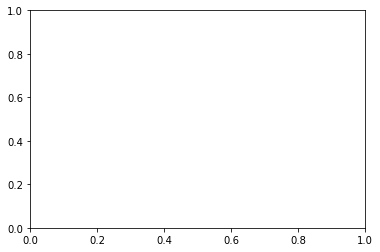

In [230]:
plt.plot(tfid_test)

In [297]:
test_nb = model_nb.predict(tfid_test)
test_nb

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [298]:
test_nb.shape

(3714,)

In [301]:
submission = pd.DataFrame({
    'review_id': data_test['review_id'],
    'category' : test_nb
})
submission

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,1
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,0
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,0
3710,4fabd4722dd4074841f9656f75105f09,0
3711,44ff89997547d54cccb2a33776181240,0
3712,c46cf84e3665a10199a539fee919edd6,1


In [306]:
submission.to_csv('submisi1.csv',index=False)

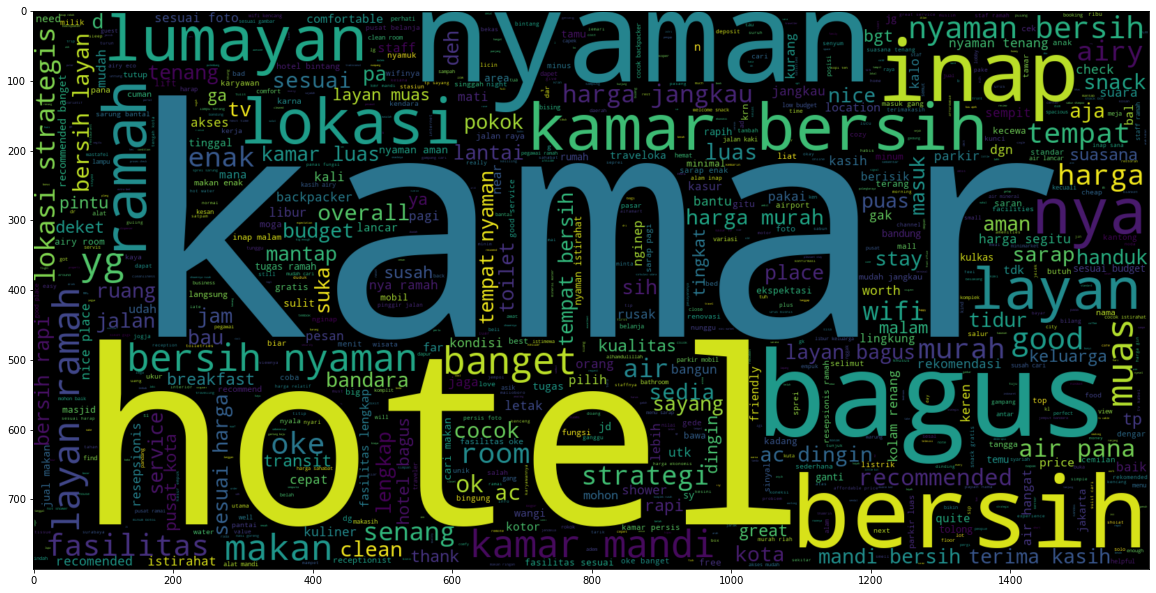

In [170]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category == 1].review_text))
plt.imshow(wc, interpolation='bilinear')

In [34]:
def stemm(data):
    words = []
    for word in data:
        stm = stemmer.stem(word)
        words.append(stm)
    return words

In [24]:
stemm = [ stemming(data) for data in review[0]]
stemm

['inap',
 'rapi',
 'bersih',
 'suasana',
 'tenang',
 'layan',
 'ramah',
 'bantu',
 'lokasi',
 'obyek',
 'wisata',
 'bandung',
 'inap']

In [288]:
b = df['review_text'].loc[1:10]
for w in b:
    print(w)

['wifi', 'kamar', 'tersedia', 'heater', 'dispenser', 'tersedia', 'kursi', 'kamar', 'merokok', 'duduk', 'lantai']
['lantai', 'kamar', 'mandi', 'kotor', 'bau', 'sdh', 'jdi', 'sarang', 'nyamuk', 'dikamar', 'mandinya', 'pesan', 'superior', 'double', 'yg', 'dikasih', 'twin', 'murah', 'maklumin', 'tpi', 'kedepan', 'mohon', 'jdi', 'perbaikan', 'lbh', 'lg']
['wc', 'jorok', 'kasur', 'dibersihkan', 'handuk', 'diganti']
['bocor']
['kebersihan', 'pelayanan', 'kerapihan']
['tidur', 'krn', 'bantal', 'bau', 'apek']
['pelayanannya', 'kmr', 'bersih', 'menu', 'makanannya', 'enak', 'to', 'sayang', 'wifinya', 'kutang', 'bagus']
['kamar', 'kecoa', 'tlg', 'diperhatikan', 'kebersihannya']
['kamar', 'mandi', 'banjir']
['menjaga', 'kebersihan', 'tidur', 'kenyamanan', 'tamu', 'betiga', 'beranak', 'tilamnya', 'hibak', 'pempijit', 'sarang', 'pempijit', 'dikepala', 'ranjangnya', 'untungnya', 'pindah', 'kamar']


In [175]:
df['review_text'][] = [ tokenize(data) for data in df['review_text'] ]
df['review_text'] = [ hapusSimbol(data) for data in df['review_text'] ]
df['review_text'] = [ stemming(row) for data in df['review_text'] for row in data ]

[['penginapannya',
  'rapi',
  'bersih',
  'suasana',
  'tenang',
  'pelayannya',
  'ramah',
  'dan',
  'banyak',
  'membantu',
  'lokasi',
  'cukup',
  'dekat',
  'ke',
  'beberapa',
  'obyek',
  'wisata',
  'kalau',
  'saya',
  'ke',
  'bandung',
  'lagi',
  'mungkin',
  'saya',
  'akan',
  'menginap',
  'lagi',
  'di',
  'sini'],
 ['wifi',
  'tidak',
  'sampai',
  'kamar',
  'tidak',
  'tersedia',
  'heater',
  'untuk',
  'atau',
  'dispenser',
  'dan',
  'tidak',
  'tersedia',
  'kursi',
  'di',
  'depan',
  'kamar',
  'untuk',
  'merokok',
  'hingga',
  'harus',
  'duduk',
  'di',
  'lantai'],
 ['lantai',
  'kamar',
  'mandi',
  'kotor',
  'bau',
  'dan',
  'seperti',
  'sdh',
  'jdi',
  'sarang',
  'nyamuk',
  'dikamar',
  'mandinya',
  'pesan',
  'superior',
  'double',
  'yg',
  'dikasih',
  'twin',
  'mungkin',
  'karena',
  'murah',
  'saya',
  'maklumin',
  'tpi',
  'kedepan',
  'mohon',
  'untuk',
  'bisa',
  'jdi',
  'perbaikan',
  'untuk',
  'bisa',
  'lbh',
  'baik',
  '

In [149]:
b = tokenize(data['review_text'][0])
a = hapusSimbol(b)
stm = [stemming(row) for row in a]
cleanData = removeStopWords(stm)
cleanData

['inap',
 'rapi',
 'bersih',
 'suasana',
 'tenang',
 'layan',
 'ramah',
 'bantu',
 'lokasi',
 'obyek',
 'wisata',
 'bandung',
 'inap']

In [44]:
data = data.drop(columns='review_id')
data

,review_text,category
0,"penginapannya rapi, bersih, suasana tenang, pe...",1
1,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,"lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,"wc jorok.. kasur tidak dibersihkan,, handuk ti...",0
4,bocor lagi,0
...,...,...
14851,kotor dan tidak ada wifi,0
14852,kamar tidak bersih,0
14853,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,wifinya sangat kurang memadai..,0


In [66]:
data1 = data['review_text'][0]
data1.isalpha
data1 = word_tokenize(data1)

In [68]:
data1 = [data for data in data1 if data.isalpha()]

In [76]:
for row in range(len(data.review_text)):
    data_review[row] = word_tokenize(data_review[row])

<ipython-input-76-1398cd7e5fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_review[row] = word_tokenize(data_review[row])


In [91]:
#tokenize review text column using word_tokenize
data_review = [word_tokenize(data) for data in data_review]

In [94]:
freq_word = [FreqDist(data_review[row]) for row in range(len(data_review))]

In [142]:
long_words = [i for row in data_review for i in row if len(i)>3]

In [158]:
data.review_text

0        Penginapannya rapi, bersih, suasana tenang, pe...
1        wifi tidak sampai kamar, tidak tersedia heater...
2        Lantai kamar mandi kotor, bau, dan seperti sdh...
3        Wc jorok.. Kasur tidak dibersihkan,, handuk ti...
4                                               bocor lagi
                               ...                        
14851                             kotor dan tidak ada wifi
14852                                   Kamar tidak bersih
14853    kamarnya terlalu kecil beberapa cm antara kasu...
14854                      Wifinya sangat kurang memadai..
14855    Pelayan sangat sangat buruk. Dulu pelayan nya ...
Name: review_text, Length: 14856, dtype: object

In [134]:
most = [row.most_common() for row in freq_word]

In [136]:
len(most)

14856